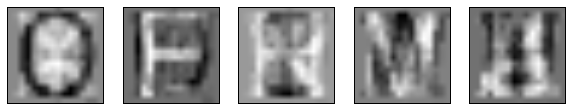

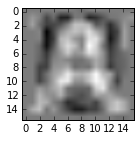

In [39]:
%matplotlib inline

'''
Name: Terry Tran
Partner: Jacob Baca
Homework 08

'''

#part 1: image preparation 

#y_lo, y_hi crop y direction
#x_lo, x_hi crop x direction
#edge_pix removes the edge crap
#plot_let self explanatory

from __future__ import print_function, division #refers to python3
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
from scipy.interpolate import interp2d

#edge_pix dictionary; key = letter, value = amount to crop AKA edge_pix
#epd = {'A': 138, 'B': 130, 'C': 129, 'D': 140, 'E': 120, 'F': 113, 'G': 146, 'H': 146, 'I': 146, 'J': 86, 'K': 127, 'L': 100, 'M': 160, 'N': 140, 'O': 155, 'P': 126, 'Q': 155, 'R': 131, 'S': 114, 'T': 121, 'U': 135, 'V': 137, 'W': 210, 'X': 127, 'Y': 120, 'Z': 115}             

# for argh in epd:
#     edge_pix = epd.values()

def make_let_im(let_file, edge_pix, dim = 16, y_lo = 70, y_hi = 220, x_lo = 10, x_hi = 200, plot_let = False):
    
    #1 display cropped image
    letter = mpimg.imread(let_file)
    letterr = letter[:, :, 0]
    #print(letterr.shape)
    
    cropped = letterr[y_lo: y_hi, x_lo: x_hi]
    cropped[:, edge_pix:] = 1
    #print(cropped.shape)
    
    #2 interpolation2d
    x = np.arange(cropped.shape[1])
    y = np.arange(cropped.shape[0])
    f2d = interp2d(x, y, cropped)
    x_new = np.linspace(0, cropped.shape[1], dim)
    y_new = np.linspace(0, cropped.shape[0], dim)
    #print(x_new.shape)

    let_im = f2d(x_new, y_new)
    let_im_flat = let_im.flatten()
    #print(let_im.shape)
    #print(let_im_flat.shape)    

    if plot_let:
        plt.imshow(let_im, cmap = 'gray')
        plt.grid('off')
        plt.show()

    return let_im, let_im_flat

A, A_flat = make_let_im('letterA.png', 138)
B, B_flat = make_let_im('letterB.png', 130)
C, C_flat = make_let_im('letterC.png', 129)
D, D_flat = make_let_im('letterD.png', 140)
E, E_flat = make_let_im('letterE.png', 120)
F, F_flat = make_let_im('letterF.png', 113)
G, G_flat = make_let_im('letterG.png', 146)
H, H_flat = make_let_im('letterH.png', 146)
I, I_flat = make_let_im('letterI.png', 146)
J, J_flat = make_let_im('letterJ.png', 86)
K, K_flat = make_let_im('letterK.png', 127)
L, L_flat = make_let_im('letterL.png', 100)
M, M_flat = make_let_im('letterM.png', 160)
N, N_flat = make_let_im('letterN.png', 140)
O, O_flat = make_let_im('letterO.png', 155)
P, P_flat = make_let_im('letterP.png', 126)
Q, Q_flat = make_let_im('letterQ.png', 155)
R, R_flat = make_let_im('letterR.png', 131)
S, S_flat = make_let_im('letterS.png', 114)
T, T_flat = make_let_im('letterT.png', 121)
U, U_flat = make_let_im('letterU.png', 135)
V, V_flat = make_let_im('letterV.png', 137)
W, W_flat = make_let_im('letterW.png', 210)
X, X_flat = make_let_im('letterX.png', 127)
Y, Y_flat = make_let_im('letterY.png', 120)
Z, Z_flat = make_let_im('letterZ.png', 115)
flat = [A_flat, B_flat, C_flat, D_flat, E_flat, F_flat, G_flat, H_flat, I_flat, J_flat, K_flat, L_flat, M_flat, N_flat, O_flat, P_flat, Q_flat, R_flat, S_flat, T_flat, U_flat, V_flat, W_flat, X_flat, Y_flat, Z_flat]

#part 2: data array construction
X_arr = np.zeros((26, 256))
i = 0
while i < 26:
    X_arr[i,] = flat[i]
    i += 1

#part 3: principal component analysis (PCA)
def alphabet_pca(X_arr, n_comp = 5): #should eventually let n_comp be determined by argparse
    pca = PCA(n_comp)  
    Xproj = pca.fit_transform(X_arr)
    pca_comps = pca.components_
    
    return pca, Xproj, pca_comps

pca, Xproj, pca_comps = alphabet_pca(X_arr)

def show_pca_im(Xproj, pca_comps, n_comp = 5, dim = 16, let_idx = 0): #should eventually let n_comp be determined by argparse
    #needs to display eigenimages and PCA constructed image (number of eigenimages depends on n_comp)
    
    f, axes = plt.subplots(1, n_comp, figsize = (10, 2), subplot_kw=dict(xticks=[], yticks=[]))
    for i in range(n_comp):
        axes[i].imshow(pca_comps[i].reshape((dim, dim)), cmap='binary')

    let_im = np.zeros((dim, dim))
    coeffs = Xproj[let_idx]

    #print('coeffs.shape', coeffs.shape)
    for i in range(n_comp):
        let_im += coeffs[i]*pca_comps[i].reshape((dim, dim))
        
    fig, ax = plt.subplots(1, 1, figsize = (2, 2))
    ax.imshow(let_im, cmap='binary')
    ax.grid(False)
    plt.show()
    
show_pca_im(Xproj, pca_comps)